In [ ]:
import os
from pathlib import Path
from PIL import Image

def cut_img_half(img, out_path):
    img = Image.open(img)
    width, height = img.size
    img1 = img.crop((0, 0, width/2, height))
    img2 = img.crop((width/2, 0, width, height))
    img1.save(out_path + '1.png')
    img2.save(out_path + '2.png')

In [ ]:
cut_img_half("data/aamsc-inconsistency-plot.png", "data/")

mean 0.99971634 std 6.7700756e-05
plot Inconsistency distribution


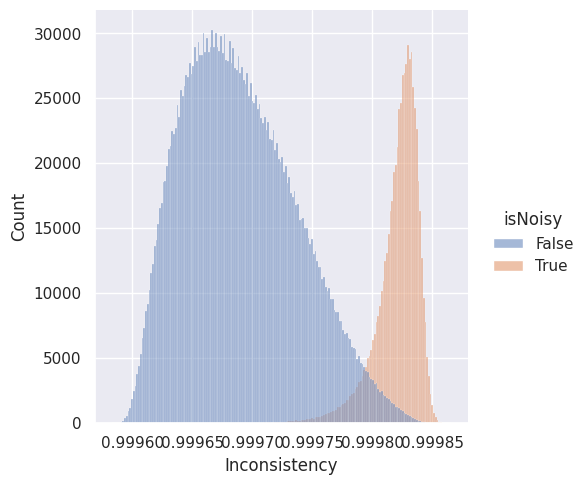

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ypreds = "data/training-models/Open-20-AAMSC-bs256-s15.0-m0.1-K10-seed0/nld-confidence-inconsistencies-final.npy"
ylabels = ypreds.replace("inconsistencies", "noise-labels")
ypreds = np.load(ypreds)
ylabels = np.load(ylabels)

selected_indices = np.argsort(ypreds)
# reverse order
selected_indices = selected_indices[::-1]
ypreds = ypreds[selected_indices]
ylabels = ylabels[selected_indices]

# # remove outliers
# upper_threshold = ypreds.mean() + 2 * ypreds.std()
# lower_threshold = ypreds.mean() - 2 * ypreds.std()
# print("threshold", [upper_threshold, lower_threshold], "mean", ypreds.mean(), "std", ypreds.std())
# filtered_idx = np.where((ypreds < upper_threshold) & (ypreds > lower_threshold))[0]
# ypreds = ypreds[filtered_idx]
# ylabels = ylabels[filtered_idx]

# normalize to [0,1]
# ypreds = (ypreds - ypreds.min()) / (ypreds.max() - ypreds.min())

print("mean", ypreds.mean(), "std", ypreds.std())

# create df from ypreds and ylabels
df = pd.DataFrame({"Inconsistency": ypreds, "isNoisy": ylabels})
print("plot Inconsistency distribution")
import seaborn as sns
sns.set()
# ax = sns.displot(ypreds)
p = sns.displot(df, x="Inconsistency", hue="isNoisy")
p.fig.set_dpi(100)

In [5]:
ypreds

array([1.0000000e+00, 1.0000000e+00, 9.9999994e-01, ..., 4.2438507e-05,
       3.6835670e-05, 1.8835068e-05], dtype=float32)

In [ ]:
50*0.5

In [ ]:
75*0.75